<a href="https://colab.research.google.com/github/mong-head/sensation_and_perception/blob/master/psychometric_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git clone https://github.com/mong-head/sensation_and_perception.git

Cloning into 'sensation_and_perception'...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

%matplotlib inline
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression

from pandas import Series, DataFrame
from sklearn.model_selection import cross_val_score

In [0]:
def session_graph(session):
  csv_file = '/content/drive/My Drive/Colab Notebooks/session'+str(session)+'.csv'
  x = pd.read_csv(csv_file)
  y = pd.read_csv(csv_file)
  X = x.drop("label",axis=1)
  Y = y.drop("px",axis=1)

  softmax_reg = LogisticRegression(solver = 'liblinear', C=1000000000000, random_state=42)
  X_ = X.values.reshape(-1,1)
  softmax_reg.fit(X_,Y.values.ravel())
  softmax_val = cross_val_score(softmax_reg,X_,Y.values.ravel(), cv=10, scoring="accuracy").mean()

  prob = []
  for i in X_:
    p_loss, p_win = softmax_reg.predict_proba([i])[0]
    prob.append(p_win)

  #pse
  myrange = np.linspace(450,490,100000)
  for absolute_threshold in myrange:
    p = softmax_reg.predict_proba([[absolute_threshold]])
    if p[0][1] < 0.50001 and p[0][1] > 0.49999:
      break

  #jnd
  myrange2 = np.linspace(470,530,100000)
  for for_jnd in myrange2:
    p = softmax_reg.predict_proba([[for_jnd]])
    if p[0][1] < 0.75001 and p[0][1] > 0.74999:
      break
  jnd = for_jnd - absolute_threshold

  X_result = []
  y_result = []
  for i in range(370,531,20):
    for j in range(0,224):
      if X.values[j][0] == i:
        X_result.append(i)
        y_result.append(prob[j])
        break
  print('<<Session ',session,'>>')
  print('cross validation score(얼마나 믿을만한 그래프인지) : ',softmax_val)
  plt.scatter(X_result,y_result)
  plt.scatter(absolute_threshold,0.5)
  plt.scatter(for_jnd,0.75)
  plt.plot(X_result,y_result)
  plt.show()
  print('absolute threshold(50%) : ',absolute_threshold)
  print('75%지점 : ',for_jnd)
  print('jnd(difference threshold) : ',jnd)
  print()
  print()

<<Session  1 >>
cross validation score(얼마나 믿을만한 그래프인지) :  0.8523715415019761


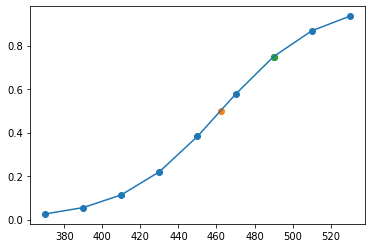

absolute threshold(50%) :  462.1669216692167
75%지점 :  490.06840068400686
jnd(difference threshold) :  27.90147901479014


<<Session  2 >>
cross validation score(얼마나 믿을만한 그래프인지) :  0.8401185770750988


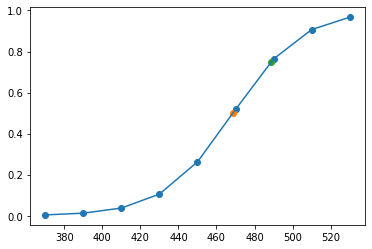

absolute threshold(50%) :  468.7045870458705
75%지점 :  488.61758617586173
jnd(difference threshold) :  19.91299912999125


<<Session  3 >>
cross validation score(얼마나 믿을만한 그래프인지) :  0.683794466403162


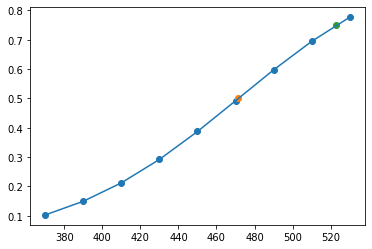

absolute threshold(50%) :  471.49221492214923
75%지점 :  523.0189301893018
jnd(difference threshold) :  51.52671526715261




In [10]:
session_graph(1)
session_graph(2)
session_graph(3)